<img style="float: left; margin: 35px 20px 20px 20px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ariadna Galindo y Gabriela Montoya 

**Fecha:** 20 de octubre del 2020.

**Expediente** : 718272 y 715478.

**Profesor:** Oscar David Jaramillo Zuluaga.

**Repositorio:** https://github.com/ariadnagalindom/Proyecto_GIMontoya_ADGalindo
    

___
## 1. Entregable.

### 1.1 Turismo en Jalisco.
> A lo largo de este proyecto se simularán viajes posibles 

### 1.2 Objetivos.
> #### 1.1 Generar propuestas de valor para aumentar el turismo en Jalisco
>  - Simular diferentes dos perfiles de turistas (nacional e internacional) para Jalisco y en base al perfil más común generar propuestas de valor para promover el turismo.  
> #### 1.2 Objetivos específicos
> - Determinar la zona con mayor turismo de Jalisco.
> - Calcular el turista más común para cada zona.
> - Proponer implementaciones para aumentar el turismo en cada zona.

### 1.3 Definición del problema.
> En el año 2019 se vivieron situaciones normales diferentes a las actuales por la pandemía y uno de los sectores más afectados es el de turismo. Con la reactivación gradual que se está dando de la economía es importante preveer medidas estratégicas para la recuperación de la economía. 

> Para proponer estrategías primero debemos de enfocarnos a quién van dirigidas y que estas sean lo más acertivas posible. Es por esto que proponemos encontrar el perfil del turista más común en años pasados para las dos zonas más turistícas del estado de Jalisco. 

> Se va a simular en base a los datos del turismo en Jalisco y sus zona más importantes en el turismo del año pasado. 

<img src="Diagrama2.png">

### 1.4 Nodos y variables que se decidieron simular y porqué
> Los nodos a utilizar tienen que ver con características sociológicas de los turistas de Jalisco en el año pasado tales como: 
> - Foráneo o nacional
> - Rango de edad
> - Estado civil 
> - Nivel de educación 
> - Motivación del viaje

### 1.5 Definición de hipótesis y supuestos.
**Hipótesis**
- $H_o$: Existe correlación entre los turistas nacionales e internaciones
- $H_1$: No existe correlación entre las turistas nacionales e internaciones

**Suposiciones**
- El turismo se mueve igual este año al pasado
- Con el perfil más común de turista se puede atraer a más del mismo tipo
- Las estrategías para el perfil de turista más común impulsará el turismo 

### 1.6 Obtención de bases de datos
> Los datos necesitados han sido obtenidos de: https://secturjal.jalisco.gob.mx/invierte-en-jalisco/estadisticas
> Donde encontramos diferentes datos sobre los turistas que hibieron el 2019 en Jalisco. Hay datos de Turistas nacionales e internacionales. No hay datos sobre los gastos en el viaje, pero hay datos sobre aspectos económicos de los turistas como ingresos mensuales. 

Para los primeros cuatro nodos podemos verlos en las características sociológicas, mientras que el motivo del viaje lo encontramos dentro de la información respecto al viaje. 

### 1.7 Variables 

>**nac_edad:** Porcentaje de distribución de las edades en turistas nacionales seccionado por 15-25, 26-34, 35-44, 45-54, 55-64, 65 y más.

>**int_edad:** Porcentaje de distribución de las edades en turistas internacionales seccionado por 15-25, 26-34, 35-44, 45-54, 55-64, 65 y más.

>**nac_civil:** Porcentaje de distribución de el estado civil en turistas nacionales seccionado por soltero, casado, unión libre, viudo y divorciado.

>**int_civil:** Porcentaje de distribución de el estado civil en turistas internacionales seccionado por soltero, casado, unión libre, viudo y divorciado.

>**nac_school:** Porcentaje de distribución del nivel de educación en turistas nacionales seccionado en básico, intermedio, medio superior, superior, posgrado y sin estudios.

>**int_school:** Porcentaje de distribución del nivel de educación en turistas nacionales seccionado en básico, intermedio, medio superior, superior, posgrado y sin estudios. 

>**nac_motiv:** Porcentaje de distribución de motivación de la afluencia turística en turistas nacionales seccionado por compras, de paso, ocio y recreación, profesional o negocios, salud, visitar amigos y familiares, religioso y otro.

>**int_motiv:** Porcentaje de distribución de motivación de la afluencia turística en turistas internacionales seccionado por compras, de paso, ocio y recreación, profesional o negocios, salud, visitar amigos y familiares, religioso y otro.

In [1]:
#librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from scipy.stats.distributions import norm
from sklearn.model_selection import GridSearchCV

In [59]:
def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            xlabel:'x label',
                            ylabel: 'y label',
                            title: 'title'):
    '''Función para graficar el histograma de una distribución discreta'''
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)),y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [2]:
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='u', **kwargs)
    return kde.pdf(x_grid)
def kde_statsmodels_m2(x, bandwidth=0.2):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',
                          var_type='u')
    return lambda x_grid:kde.pdf(x_grid)

In [3]:
dist_continu = [d for d in dir(st) if isinstance(getattr(st, d), st.rv_continuous)]
dist_to=['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'bradford',
 'burr',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'frechet_l',
 'frechet_r',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'laplace',
 'levy',
 'levy_l',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm',
 'rayleigh',
 'rdist',
 'recipinvgauss',
 'reciprocal',
 'rice',
 'semicircular',
 'skewnorm',
 't',
 'trapz',
 'triang',
 'truncexpon',
 'truncnorm',
 'tukeylambda',
 'uniform',
 'vonmises',
 'vonmises_line',
 'wald',
 'weibull_max',
 'weibull_min',
 'wrapcauchy']

In [4]:
#importamos base de datos sociológicos 
data=pd.read_excel('anuario_2019.xlsx', sheet_name="2.3 Determinantes Sociológicos", usecols="A,B",header=None).dropna()
#importamos base de datos económicos
data2=pd.read_excel('anuario_2019.xlsx', sheet_name="Respecto del viaje", usecols="A,B",header=None).dropna()

In [40]:
#segmentamos la base de datos para generar variables 
#nodo 1: EDAD
nac_edad=data.iloc[8:14]
nac_edad.columns=(["AMG","probabilidad"])
#nac_edad["frecuencia"]=nac_edad["probabilidad"]*26801143

int_edad=data.iloc[15:21]
int_edad.columns=(["AMG","probabilidad"])

#nodo 2: ESTADO CIVIL
nac_civil=data.iloc[22:27]
nac_civil.columns=(["AMG","probabilidad"])
#nac_civil["frecuencia"]=nac_civil["probabilidad"]*26801143

int_civil=data.iloc[28:33]
int_civil.columns=(["AMG","probabilidad"])

#nodo 3: NIVEL DE ESCOLARIDAD
nac_school=data.iloc[34:40]
nac_school.columns=(["AMG","probabilidad"])

int_school=data.iloc[41:47]
int_school.columns=(["AMG","probabilidad"])

# nodo 4: MOTIVACIÓN PARA HACER EL VIAJE
nac_motiv=data2.iloc[13:20]
nac_motiv.columns=(["AMG","probabilidad"])

int_motiv=data2.iloc[22:29]
int_motiv.columns=(["AMG","probabilidad"])

## Nodo 1: Rango de edad

### Nacional

In [42]:
nac_edad

,AMG,probabilidad
24,15 a 25,0.107623
25,26 a 34,0.360987
26,35 a 44,0.186099
27,45 a 54,0.195067
28,55 a 64,0.112108
29,65 y más,0.0381166


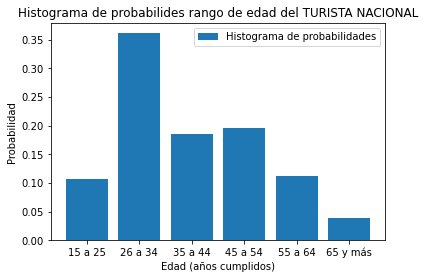

In [61]:
plt.bar(nac_edad.index,nac_edad.AMG, label='Histograma de probabilidades')
plt.xlabel('Edad (años cumplidos)')
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides rango de edad del TURISTA NACIONAL')
plt.legend()
plt.show()

In [8]:
import warnings
warnings.filterwarnings("ignore")
e=[]
y=np.array(nac_edad.probabilidad,dtype=float)

for dist_name in dist_to: 
    dist=getattr(st,dist_name)  
    param =dist.fit(y)
    a=st.kstest(y,dist_name,args=param)#K-S test based on p-values
    e.append((dist_name,a[0],a[1]))

e.sort(key=lambda x:float(x[2]),reverse=True)#sort by p-values
for j in e:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

nct: statistic=0.15889372415884484, pvalue=0.9914241407638659
invweibull: statistic=0.15891347816704626, pvalue=0.9914106798736481
genextreme: statistic=0.15891784984091828, pvalue=0.9914076985242439
invgamma: statistic=0.15948252318017397, pvalue=0.9910152873136193
powerlognorm: statistic=0.16412137654312173, pvalue=0.9871886467883659
johnsonsu: statistic=0.16462572415968577, pvalue=0.9867012185481345
lognorm: statistic=0.16517499095227903, pvalue=0.9861528954169292
fisk: statistic=0.1662542713923043, pvalue=0.9850204864779823
kappa3: statistic=0.1666666579516511, pvalue=0.9845679109179161
moyal: statistic=0.16666989753964775, pvalue=0.9845649095057338
exponnorm: statistic=0.16859354134455762, pvalue=0.9827192483362238
frechet_l: statistic=0.16998401889819303, pvalue=0.9813038847456107
weibull_max: statistic=0.16998401889819303, pvalue=0.9813038847456107
norminvgauss: statistic=0.16999063327423194, pvalue=0.9812969867119373
gumbel_r: statistic=0.1701953193743132, pvalue=0.981082743935

La distribucón que mejor se ajusta a la distribución de probabilidades de los turistas nacionales es `nct` por lo que haremos la prueba de cuantil cuantil para ver que tanto se ajusta 

In [ ]:
#QQ

In [43]:
int_edad

,AMG,probabilidad
35,15 a 25,0.125
36,26 a 34,0.471154
37,35 a 44,0.153846
38,45 a 54,0.125
39,55 a 64,0.0865385
40,65 y más,0.0384615


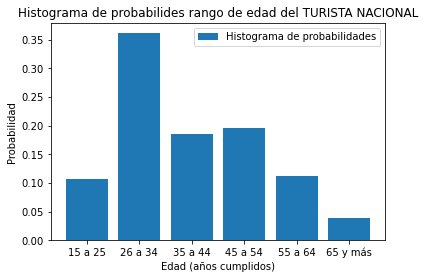

In [65]:
plt.bar(int_edad.index,nac_edad.AMG, label='Histograma de probabilidades')
plt.xlabel('Edad (años cumplidos)')
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides rango de edad del TURISTA NACIONAL')
plt.legend()
plt.show()

In [44]:
import warnings
warnings.filterwarnings("ignore")
e=[]
y=np.array(int_edad.probabilidad,dtype=float)

for dist_name in dist_to: 
    dist=getattr(st,dist_name)  
    param =dist.fit(y)
    a=st.kstest(y,dist_name,args=param)#K-S test based on p-values
    e.append((dist_name,a[0],a[1]))

e.sort(key=lambda x:float(x[2]),reverse=True)#sort by p-values
for j in e:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

dgamma: statistic=0.16666666667221525, pvalue=0.9845679012294303
loglaplace: statistic=0.1673100886996518, pvalue=0.9839649889981006
foldcauchy: statistic=0.17289423232864687, pvalue=0.9781150725565655
laplace: statistic=0.18703515703536422, pvalue=0.9579693398421848
t: statistic=0.19257777480858324, pvalue=0.9478415633913978
nct: statistic=0.19450186448781287, pvalue=0.9440203702200007
invweibull: statistic=0.1945225291522522, pvalue=0.9439784693579987
genextreme: statistic=0.19452327230973665, pvalue=0.9439769621475746
fisk: statistic=0.19658479922319944, pvalue=0.9397045257718827
invgamma: statistic=0.1968119860368993, pvalue=0.9392224917984862
lognorm: statistic=0.20070741438434364, pvalue=0.9306105047202443
gennorm: statistic=0.20154819700547413, pvalue=0.928665597914654
dweibull: statistic=0.20197871089893432, pvalue=0.9276578898099677
norminvgauss: statistic=0.20287029310304405, pvalue=0.9255454640971909
wald: statistic=0.2030402142518246, pvalue=0.9251389706555951
cauchy: stati

La distribucón que mejor se ajusta a la distribución de probabilidades de los turistas nacionales es `dgamma` por lo que haremos la prueba de cuantil cuantil para ver que tanto se ajusta 

In [ ]:
#QQ

## Nodo 2: Estado civil

In [45]:
nac_civil

,AMG,probabilidad
48,Soltero,0.319911
49,Casado,0.55481
50,Unión Libre,0.0425056
51,Viudo,0.0290828
52,Divorciado,0.0536913


In [44]:
import warnings
warnings.filterwarnings("ignore")
e=[]
y=np.array(int_edad.probabilidad,dtype=float)

for dist_name in dist_to: 
    dist=getattr(st,dist_name)  
    param =dist.fit(y)
    a=st.kstest(y,dist_name,args=param)#K-S test based on p-values
    e.append((dist_name,a[0],a[1]))

e.sort(key=lambda x:float(x[2]),reverse=True)#sort by p-values
for j in e:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

dgamma: statistic=0.16666666667221525, pvalue=0.9845679012294303
loglaplace: statistic=0.1673100886996518, pvalue=0.9839649889981006
foldcauchy: statistic=0.17289423232864687, pvalue=0.9781150725565655
laplace: statistic=0.18703515703536422, pvalue=0.9579693398421848
t: statistic=0.19257777480858324, pvalue=0.9478415633913978
nct: statistic=0.19450186448781287, pvalue=0.9440203702200007
invweibull: statistic=0.1945225291522522, pvalue=0.9439784693579987
genextreme: statistic=0.19452327230973665, pvalue=0.9439769621475746
fisk: statistic=0.19658479922319944, pvalue=0.9397045257718827
invgamma: statistic=0.1968119860368993, pvalue=0.9392224917984862
lognorm: statistic=0.20070741438434364, pvalue=0.9306105047202443
gennorm: statistic=0.20154819700547413, pvalue=0.928665597914654
dweibull: statistic=0.20197871089893432, pvalue=0.9276578898099677
norminvgauss: statistic=0.20287029310304405, pvalue=0.9255454640971909
wald: statistic=0.2030402142518246, pvalue=0.9251389706555951
cauchy: stati

La distribucón que mejor se ajusta a la distribución de probabilidades de los turistas nacionales es `dgamma` por lo que haremos la prueba de cuantil cuantil para ver que tanto se ajusta 

In [46]:
int_civil

,AMG,probabilidad
58,Soltero,0.542857
59,Casado,0.285714
60,Unión Libre,0.0571429
61,Viudo,0.047619
62,Divorciado,0.0666667


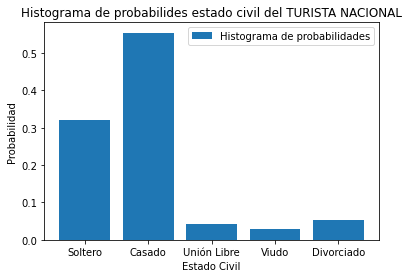

In [64]:
plt.bar(int_civil.index,nac_civil.AMG, label='Histograma de probabilidades')
plt.xlabel('Estado Civil')
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides estado civil del TURISTA NACIONAL')
plt.legend()
plt.show()

In [47]:
import warnings
warnings.filterwarnings("ignore")
e=[]
y=np.array(int_civil.probabilidad,dtype=float)

for dist_name in dist_to: 
    dist=getattr(st,dist_name)  
    param =dist.fit(y)
    a=st.kstest(y,dist_name,args=param)#K-S test based on p-values
    e.append((dist_name,a[0],a[1]))

e.sort(key=lambda x:float(x[2]),reverse=True)#sort by p-values
for j in e:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

beta: statistic=0.199999854684073, pvalue=0.9616002790057689
burr: statistic=0.1999998669416874, pvalue=0.9616002554712804
exponweib: statistic=0.19999999999992774, pvalue=0.9616000000001387
nakagami: statistic=0.20048624248779234, pvalue=0.9608492718849306
pareto: statistic=0.22362910072851222, pvalue=0.916156811974089
genpareto: statistic=0.2249041050520485, pvalue=0.9131878981350521
levy: statistic=0.24718524038825684, pvalue=0.8532069599939912
fisk: statistic=0.24805990789360888, pvalue=0.8505555911380345
chi: statistic=0.2560218766971857, pvalue=0.8254797555838124
frechet_r: statistic=0.26093830958143804, pvalue=0.8091938849433328
weibull_min: statistic=0.26093830958143804, pvalue=0.8091938849433328
f: statistic=0.26783171340423506, pvalue=0.7854207742770981
dgamma: statistic=0.2759825551654491, pvalue=0.7560579641809362
hypsecant: statistic=0.2831799802908271, pvalue=0.729180947449015
invgauss: statistic=0.28354979163334926, pvalue=0.7277794533651775
alpha: statistic=0.2903855126

La distribucón que mejor se ajusta a la distribución de probabilidades de los turistas nacionales es `beta` por lo que haremos la prueba de cuantil cuantil para ver que tanto se ajusta 

## Nodo 3: Nivel de escolaridad

In [48]:
nac_school

,AMG,probabilidad
70,Básico,0.00447427
71,Intermedio,0.0738255
72,Medio Superior,0.306488
73,Superior,0.512304
74,Posgrado,0.0917226
75,Sin Estudios,0.0111857


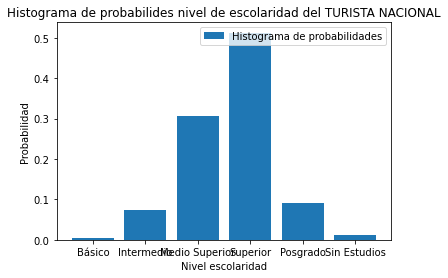

In [62]:
plt.bar(nac_school.index,nac_school.AMG, label='Histograma de probabilidades')
plt.xlabel('Nivel escolaridad')
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides nivel de escolaridad del TURISTA NACIONAL')
plt.legend()
plt.show()

In [49]:
import warnings
warnings.filterwarnings("ignore")
e=[]
y=np.array(nac_school.probabilidad,dtype=float)

for dist_name in dist_to: 
    dist=getattr(st,dist_name)  
    param =dist.fit(y)
    a=st.kstest(y,dist_name,args=param)#K-S test based on p-values
    e.append((dist_name,a[0],a[1]))

e.sort(key=lambda x:float(x[2]),reverse=True)#sort by p-values
for j in e:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

nakagami: statistic=0.17038224898872512, pvalue=0.9808857665082968
chi: statistic=0.19850634296002073, pvalue=0.9355572203945962
pearson3: statistic=0.20556895715864554, pvalue=0.9189422524749281
mielke: statistic=0.21130485967421447, pvalue=0.9038686542932808
burr: statistic=0.2204403232094328, pvalue=0.8770108687163294
recipinvgauss: statistic=0.22269267393532893, pvalue=0.8698700548406313
wald: statistic=0.223243599799066, pvalue=0.8680932247694273
exponweib: statistic=0.223871268792418, pvalue=0.8660546000964453
gilbrat: statistic=0.22777690928189048, pvalue=0.8530341704933746
alpha: statistic=0.2295041936377274, pvalue=0.8470965363892153
lomax: statistic=0.233384528209229, pvalue=0.8333751336828802
gengamma: statistic=0.23588395087626174, pvalue=0.8242693718644395
powerlaw: statistic=0.23600683331631916, pvalue=0.823816512358791
frechet_r: statistic=0.2432644140180635, pvalue=0.7962720022171365
weibull_min: statistic=0.2432644140180635, pvalue=0.7962720022171365
genpareto: statist

La distribucón que mejor se ajusta a la distribución de probabilidades de los turistas nacionales es `nakagami` por lo que haremos la prueba de cuantil cuantil para ver que tanto se ajusta 

In [50]:
int_school

,AMG,probabilidad
81,Básico,0.0196078
82,Intermedio,0.0588235
83,Medio Superior,0.22549
84,Superior,0.558824
85,Posgrado,0.137255
86,Sin Estudios,0


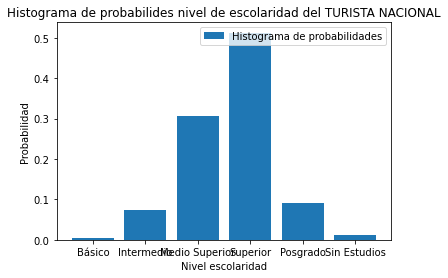

In [72]:
plt.bar(int_school.index,nac_school.AMG, label='Histograma de probabilidades')
plt.xlabel('Nivel escolaridad')
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides nivel de escolaridad del TURISTA NACIONAL')
plt.legend()
plt.show()

In [51]:
import warnings
warnings.filterwarnings("ignore")
e=[]
y=np.array(int_school.probabilidad,dtype=float)

for dist_name in dist_to: 
    dist=getattr(st,dist_name)  
    param =dist.fit(y)
    a=st.kstest(y,dist_name,args=param)#K-S test based on p-values
    e.append((dist_name,a[0],a[1]))

e.sort(key=lambda x:float(x[2]),reverse=True)#sort by p-values
for j in e:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

ncx2: statistic=0.16666666323352305, pvalue=0.9845679050491716
geninvgauss: statistic=0.16666666400003685, pvalue=0.9845679041974896
burr: statistic=0.16666666663280535, pvalue=0.9845679012721916
nakagami: statistic=0.1666666666589808, pvalue=0.9845679012431078
exponpow: statistic=0.1666666666651107, pvalue=0.9845679012362968
mielke: statistic=0.16666666666666424, pvalue=0.9845679012345706
chi: statistic=0.16666666666666569, pvalue=0.9845679012345689
gengamma: statistic=0.16666666666666666, pvalue=0.9845679012345679
pareto: statistic=0.16720132626674117, pvalue=0.9840679106985544
genpareto: statistic=0.16730685811065474, pvalue=0.9839680520196626
gilbrat: statistic=0.16824082085902192, pvalue=0.9830673657189798
wald: statistic=0.16878174459089312, pvalue=0.9825317031305548
invweibull: statistic=0.1786064841456707, pvalue=0.970930556971424
genextreme: statistic=0.1786156869849237, pvalue=0.9709179638524192
levy: statistic=0.1810243268364038, pvalue=0.9675066071957887
invgamma: statistic

La distribucón que mejor se ajusta a la distribución de probabilidades de los turistas nacionales es `ncx2` por lo que haremos la prueba de cuantil cuantil para ver que tanto se ajusta 

## Nodo 4: Motivación para hacer el viaje

In [52]:
nac_motiv

,AMG,probabilidad
21,DE PASO,0.0178571
22,OCIO Y RECREACION,0.705357
23,PROFESIONAL O NEGOCIOS,0.0602679
24,SALUD,0.0133929
25,VISITAR AMIGOS Y FAMILIARES,0.0892857
26,RELIGIOSO,0
27,OTRO,0.078125


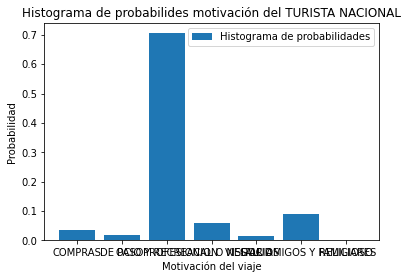

In [63]:
plt.bar(nac_motiv.index,nac_motiv.AMG, label='Histograma de probabilidades')
plt.xlabel('Motivación del viaje')
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides motivación del TURISTA NACIONAL')
plt.legend()
plt.show()

In [53]:
import warnings
warnings.filterwarnings("ignore")
e=[]
y=np.array(nac_motiv.probabilidad,dtype=float)

for dist_name in dist_to: 
    dist=getattr(st,dist_name)  
    param =dist.fit(y)
    a=st.kstest(y,dist_name,args=param)#K-S test based on p-values
    e.append((dist_name,a[0],a[1]))

e.sort(key=lambda x:float(x[2]),reverse=True)#sort by p-values
for j in e:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

genpareto: statistic=0.1806603953930111, pvalue=0.9462617376972504
lomax: statistic=0.18067583887137834, pvalue=0.9462283447430296
pareto: statistic=0.1807051961608777, pvalue=0.9461648311737917
halfcauchy: statistic=0.1826158015731874, pvalue=0.9419318291550849
ncf: statistic=0.18389593897522177, pvalue=0.9389856698081375
invgauss: statistic=0.18526145924005882, pvalue=0.9357453858464784
geninvgauss: statistic=0.18757792448979593, pvalue=0.9300176263679957
genextreme: statistic=0.19000024636948926, pvalue=0.9237172900677253
invgamma: statistic=0.19282446384223823, pvalue=0.915971947936111
nct: statistic=0.1991448420390705, pvalue=0.8971038376355408
alpha: statistic=0.19954359284283546, pvalue=0.8958437747675189
gamma: statistic=0.20037299964163768, pvalue=0.8931969177026753
levy: statistic=0.20233322481254457, pvalue=0.8868038531824286
gilbrat: statistic=0.20562525070129584, pvalue=0.8756437048015148
halfgennorm: statistic=0.20846236702316195, pvalue=0.8656170545831291
norminvgauss: s

La distribucón que mejor se ajusta a la distribución de probabilidades de los turistas nacionales es `genpareto` por lo que haremos la prueba de cuantil cuantil para ver que tanto se ajusta 

In [54]:
int_motiv

,AMG,probabilidad
33,COMPRAS,0.00952381
34,DE PASO,0.00952381
35,OCIO Y RECREACION,0.733333
36,PROFESIONAL O NEGOCIOS,0.0761905
37,SALUD,0
38,VISITAR AMIGOS Y FAMILIARES,0.0857143
39,RELIGIOSO,0


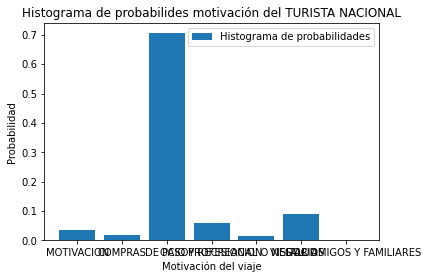

In [77]:
plt.bar(int_motiv.index,nac_motiv.AMG, label='Histograma de probabilidades')
plt.xlabel('Motivación del viaje')
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides motivación del TURISTA NACIONAL')
plt.legend()
plt.show()

In [55]:
import warnings
warnings.filterwarnings("ignore")
e=[]
y=np.array(int_motiv.probabilidad,dtype=float)

for dist_name in dist_to: 
    dist=getattr(st,dist_name)  
    param =dist.fit(y)
    a=st.kstest(y,dist_name,args=param)#K-S test based on p-values
    e.append((dist_name,a[0],a[1]))

e.sort(key=lambda x:float(x[2]),reverse=True)#sort by p-values
for j in e:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

ncf: statistic=0.28558079895293526, pvalue=0.5261029620199562
powerlaw: statistic=0.2857093369461726, pvalue=0.525558770063596
exponpow: statistic=0.2857140635306529, pvalue=0.5255387688122249
nakagami: statistic=0.285714204728257, pvalue=0.525538171323993
chi: statistic=0.28571423229481935, pvalue=0.5255380546740926
mielke: statistic=0.2857142757548618, pvalue=0.5255378707698306
gamma: statistic=0.2857142797637492, pvalue=0.5255378538059412
burr: statistic=0.28571428555193895, pvalue=0.5255378293128095
gausshyper: statistic=0.285714285557181, pvalue=0.5255378292906273
gengamma: statistic=0.2857142857142721, pvalue=0.5255378286258852
halfgennorm: statistic=0.2857142857142851, pvalue=0.5255378286258305
alpha: statistic=0.29458724874587905, pvalue=0.4884230681560785
halfcauchy: statistic=0.30404128554607635, pvalue=0.4499916012372579
pearson3: statistic=0.31405704078536867, pvalue=0.41078566312314624
norminvgauss: statistic=0.31541081505363033, pvalue=0.4056184993818118
t: statistic=0.31

La distribucón que mejor se ajusta a la distribución de probabilidades de los turistas nacionales es `ncf` por lo que haremos la prueba de cuantil cuantil para ver que tanto se ajusta 

In [2]:
#importamos base de datos sociológicos 
#importamos base de datos sociológicos 
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
d1=data.Gender
d2=data.Age
d3=data.iloc[:,-2:-1]
d4=data.iloc[:,-1:]

In [24]:
#creación de dataframe que contiene los valores únicos sus frecuencias y su probabilidad asociada a cada valor.
frec_prob=pd.DataFrame({'Valores': np.unique(d2, return_counts=True)[0],
                            'Frecuencias':np.unique(d2, return_counts=True)[1]}) 
frec_prob['Probabilidad']=frec_prob['Frecuencias']/len(d2)

frec_prob.head()

,Valores,Frecuencias,Probabilidad
0,18,4,0.020
1,19,8,0.040
2,20,5,0.025
3,21,5,0.025
4,22,3,0.015


{'bandwidth': 0.16206896551724137}


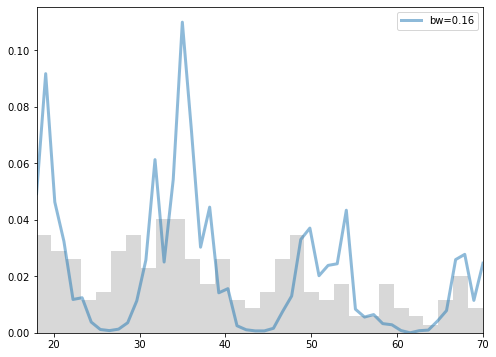

In [45]:
x_grid=np.linspace(18,70)

grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=30) # 20-fold cross-validation
grid.fit(d2[:, None])
print(grid.best_params_)

kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(d2, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper right')
ax.set_xlim(18,70);

In [50]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    pdf = lambda x: np.exp(kde_skl.score_samples(x[:, np.newaxis]))
    return pdf

In [78]:
import scipy.stats as st

def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [79]:
best_fit_distribution(nac_edad)

('norm', (0.0, 1.0))

In [80]:
best_fit_distribution(int_edad)

('norm', (0.0, 1.0))

In [81]:
best_fit_distribution(nac_civil)

('norm', (0.0, 1.0))

In [82]:
best_fit_distribution(int_civil)

('norm', (0.0, 1.0))

In [108]:
def kde_statsmodels_m(nac_edad, nac_edad_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(nac_edad_grid)

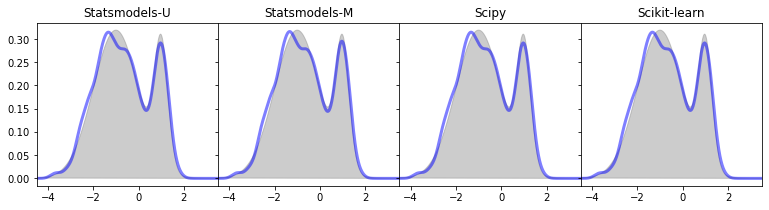

In [109]:
from scipy.stats.distributions import norm

# The grid we'll use for plotting
nac_edad_grid = np.linspace(-4.5, 3.5, 1000)

# Draw points from a bimodal distribution in 1D
np.random.seed(0)
nac_edad = np.concatenate([norm(-1, 1.).rvs(400),
                    norm(1, 0.3).rvs(100)])
pdf_true = (0.8 * norm(-1, 1).pdf(x_grid) +
            0.2 * norm(1, 0.3).pdf(x_grid))

# Plot the three kernel density estimates
fig, ax = plt.subplots(1, 4, sharey=True,
                       figsize=(13, 3))
fig.subplots_adjust(wspace=0)

for i in range(4):
    pdf = kde_funcs[i](nac_edad, nac_edad_grid, bandwidth=0.2)
    ax[i].plot(nac_edad_grid, pdf, color='blue', alpha=0.5, lw=3)
    ax[i].fill(nac_ed_grid, pdf_true, ec='gray', fc='gray', alpha=0.4)
    ax[i].set_title(kde_funcnames[i])
    ax[i].set_xlim(-4.5, 3.5)
    
from IPython.display import HTML
HTML("<font color='#666666'>Gray = True underlying distribution</font><br>"
     "<font color='6666ff'>Blue = KDE model distribution (500 pts)</font>")

In [78]:
import scipy.stats as st

def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [79]:
best_fit_distribution(nac_edad)

('norm', (0.0, 1.0))

In [80]:
best_fit_distribution(int_edad)

('norm', (0.0, 1.0))

In [81]:
best_fit_distribution(nac_civil)

('norm', (0.0, 1.0))

In [82]:
best_fit_distribution(int_civil)

('norm', (0.0, 1.0))

In [108]:
def kde_statsmodels_m(nac_edad, nac_edad_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(nac_edad_grid)

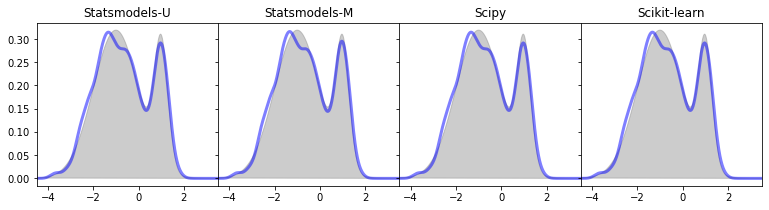

In [109]:
from scipy.stats.distributions import norm

# The grid we'll use for plotting
nac_edad_grid = np.linspace(-4.5, 3.5, 1000)

# Draw points from a bimodal distribution in 1D
np.random.seed(0)
nac_edad = np.concatenate([norm(-1, 1.).rvs(400),
                    norm(1, 0.3).rvs(100)])
pdf_true = (0.8 * norm(-1, 1).pdf(x_grid) +
            0.2 * norm(1, 0.3).pdf(x_grid))

# Plot the three kernel density estimates
fig, ax = plt.subplots(1, 4, sharey=True,
                       figsize=(13, 3))
fig.subplots_adjust(wspace=0)

for i in range(4):
    pdf = kde_funcs[i](nac_edad, nac_edad_grid, bandwidth=0.2)
    ax[i].plot(nac_edad_grid, pdf, color='blue', alpha=0.5, lw=3)
    ax[i].fill(nac_ed_grid, pdf_true, ec='gray', fc='gray', alpha=0.4)
    ax[i].set_title(kde_funcnames[i])
    ax[i].set_xlim(-4.5, 3.5)
    
from IPython.display import HTML
HTML("<font color='#666666'>Gray = True underlying distribution</font><br>"
     "<font color='6666ff'>Blue = KDE model distribution (500 pts)</font>")

In [78]:
import scipy.stats as st

def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [79]:
best_fit_distribution(nac_edad)

('norm', (0.0, 1.0))

In [80]:
best_fit_distribution(int_edad)

('norm', (0.0, 1.0))

In [81]:
best_fit_distribution(nac_civil)

('norm', (0.0, 1.0))

In [82]:
best_fit_distribution(int_civil)

('norm', (0.0, 1.0))

In [108]:
def kde_statsmodels_m(nac_edad, nac_edad_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(nac_edad_grid)

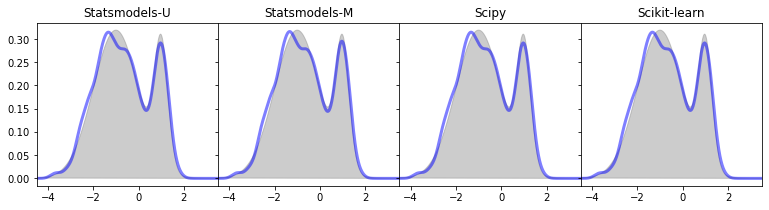

In [109]:
from scipy.stats.distributions import norm

# The grid we'll use for plotting
nac_edad_grid = np.linspace(-4.5, 3.5, 1000)

# Draw points from a bimodal distribution in 1D
np.random.seed(0)
nac_edad = np.concatenate([norm(-1, 1.).rvs(400),
                    norm(1, 0.3).rvs(100)])
pdf_true = (0.8 * norm(-1, 1).pdf(x_grid) +
            0.2 * norm(1, 0.3).pdf(x_grid))

# Plot the three kernel density estimates
fig, ax = plt.subplots(1, 4, sharey=True,
                       figsize=(13, 3))
fig.subplots_adjust(wspace=0)

for i in range(4):
    pdf = kde_funcs[i](nac_edad, nac_edad_grid, bandwidth=0.2)
    ax[i].plot(nac_edad_grid, pdf, color='blue', alpha=0.5, lw=3)
    ax[i].fill(nac_ed_grid, pdf_true, ec='gray', fc='gray', alpha=0.4)
    ax[i].set_title(kde_funcnames[i])
    ax[i].set_xlim(-4.5, 3.5)
    
from IPython.display import HTML
HTML("<font color='#666666'>Gray = True underlying distribution</font><br>"
     "<font color='6666ff'>Blue = KDE model distribution (500 pts)</font>")

### 1.7 Referencias.
> https://secturjal.jalisco.gob.mx/invierte-en-jalisco/estadisticas
> Citar (en formato APA) la bibliografía utilizada.